In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
ev=pd.read_csv("Electric_Vehicle_Population_Data.csv")
ev

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10


In [3]:
drop_col=["VIN (1-10)","Postal Code","Base MSRP","Legislative District","DOL Vehicle ID", "2020 Census Tract","Vehicle Location"]
ev=ev.drop(drop_col,axis=1)
ev.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC


In [4]:
ev

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,WA,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...
150478,King,Seattle,WA,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
150479,King,Seattle,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
150480,Snohomish,Mountlake Terrace,WA,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,PUGET SOUND ENERGY INC


In [5]:
ev.isna()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
150477,False,False,False,False,False,False,False,False,False,False
150478,False,False,False,False,False,False,False,False,False,False
150479,False,False,False,False,False,False,False,False,False,False
150480,False,False,False,False,False,False,False,False,False,False


In [6]:
state=ev["State"].value_counts().head(10)
state

State
WA    150141
CA        92
VA        35
MD        33
TX        20
NC        13
IL        12
AZ        11
CO        11
FL         9
Name: count, dtype: int64

In [7]:
ev_WA=ev[ev["State"]=="WA"]
ev_WA.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC


In [8]:
ev_WA['County'].unique()

array(['King', 'Yakima', 'Thurston', 'Snohomish', 'Island', 'Kitsap',
       'Whitman', 'Skagit', 'Kittitas', 'Walla Walla', 'Spokane',
       'Chelan', 'Grant', 'Stevens', 'Clark', 'Douglas', 'Pierce',
       'Jefferson', 'Cowlitz', 'Clallam', 'Benton', 'Lewis', 'Klickitat',
       'Grays Harbor', 'Asotin', 'San Juan', 'Whatcom', 'Franklin',
       'Okanogan', 'Mason', 'Skamania', 'Pacific', 'Pend Oreille',
       'Columbia', 'Wahkiakum', 'Adams', 'Lincoln', 'Ferry', 'Garfield'],
      dtype=object)

In [9]:
ev_type=ev_WA["Electric Vehicle Type"].value_counts()
ev_type

Electric Vehicle Type
Battery Electric Vehicle (BEV)            116585
Plug-in Hybrid Electric Vehicle (PHEV)     33556
Name: count, dtype: int64

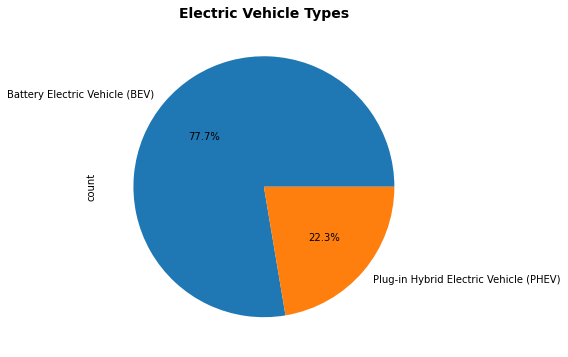

In [10]:
fig=plt.figure(figsize=(6,6))
ev_type.plot(kind="pie",autopct='%1.1f%%')
plt.title("Electric Vehicle Types",fontweight="bold",fontsize=14)
plt.show()

In [11]:
Top10=ev["Make"].value_counts().head(10)
Top10

Make
TESLA         68983
NISSAN        13497
CHEVROLET     12026
FORD           7614
BMW            6439
KIA            6198
TOYOTA         5223
VOLKSWAGEN     4074
VOLVO          3536
JEEP           3292
Name: count, dtype: int64

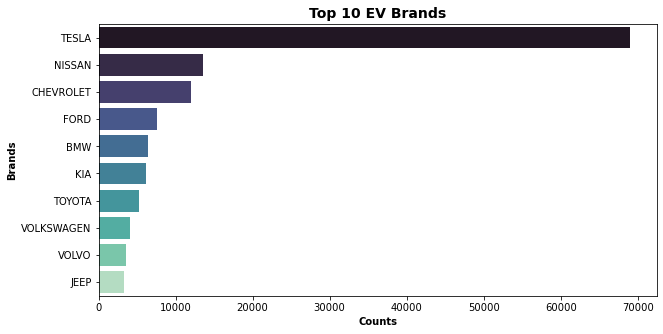

In [12]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x=Top10.values,y=Top10.index,palette="mako")
plt.title('Top 10 EV Brands',fontweight='bold',fontsize=14)
plt.xlabel('Counts',fontweight='bold',fontsize=10)
plt.ylabel('Brands',fontweight='bold',fontsize=10)
plt.show()

In [13]:
ev['City'].value_counts()

City
Seattle          25675
Bellevue          7691
Redmond           5502
Vancouver         5310
Bothell           4861
                 ...  
Anthem               1
Bay Center           1
Felts Mills          1
Rich                 1
Ellicott City        1
Name: count, Length: 683, dtype: int64

In [14]:
top_city=ev_WA['City'].value_counts().head(10)
top_city

City
Seattle      25675
Bellevue      7690
Redmond       5501
Vancouver     5310
Bothell       4861
Kirkland      4622
Sammamish     4436
Renton        4043
Olympia       3634
Tacoma        3121
Name: count, dtype: int64

In [15]:
top_brands=["TESLA","NISSAN","CHEVROLET","FORD","BMW","KIA","TOYOTA","VOLKSWAGEN","VOLVO","JEEP"]
top_10=ev_WA[ev_WA['Make'].isin(top_brands)]
ev_city=top_10.groupby(["City","Make"]).size().reset_index(name="counts") 
ev_city

,City,Make,counts
0,Aberdeen,BMW,3
1,Aberdeen,CHEVROLET,16
2,Aberdeen,FORD,16
3,Aberdeen,JEEP,5
4,Aberdeen,KIA,10
...,...,...,...
2771,Zillah,KIA,3
2772,Zillah,NISSAN,2
2773,Zillah,TESLA,6
2774,Zillah,VOLKSWAGEN,1


In [16]:
cities=["Seattle","Bellevue","Redmond","Vancouver","Bothell","Kirkland","Sammamish","Renton","Olympia","Tacoma"]
brands=["TESLA","NISSAN","CHEVROLET","FORD","BMW","KIA","TOYOTA","VOLKSWAGEN","VOLVO","JEEP"]
city_brand=ev_WA[ev_WA['City'].isin(cities) & ev_WA['Make'].isin(brands)]
top_city_brands=city_brand.groupby(['Make','City']).size().reset_index(name='Count')
top_city_brands



,Make,City,Count
0,BMW,Bellevue,394
1,BMW,Bothell,197
2,BMW,Kirkland,239
3,BMW,Olympia,100
4,BMW,Redmond,258
...,...,...,...
95,VOLVO,Renton,49
96,VOLVO,Sammamish,92
97,VOLVO,Seattle,985
98,VOLVO,Tacoma,54


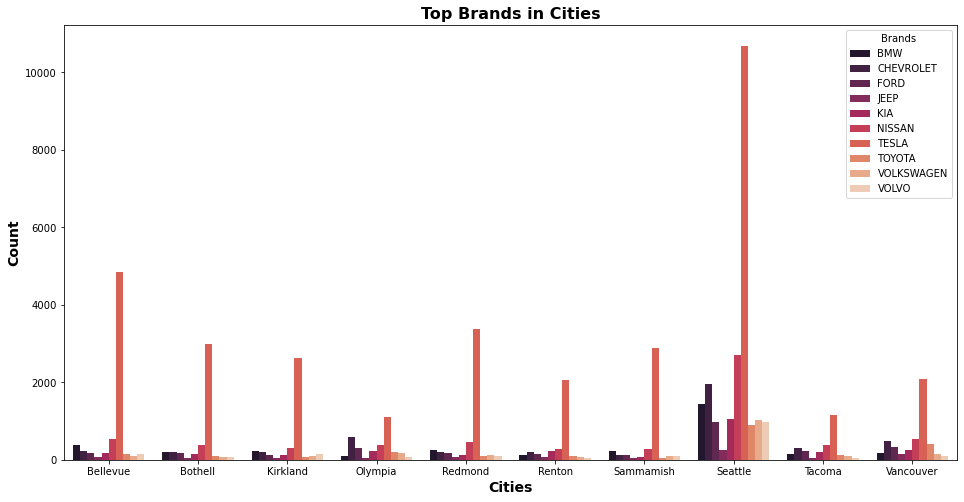

In [17]:
fig=plt.figure(figsize=(16,8))
sns.barplot(data=top_city_brands,x="City",y="Count",hue="Make",palette="rocket")
plt.legend(title="Brands")
plt.xlabel("Cities",fontweight='bold',fontsize=14)
plt.ylabel("Count",fontweight='bold',fontsize=14)
plt.title("Top Brands in Cities",fontweight='bold',fontsize=16)
plt.show()


In [18]:
top_20_counties = ev_WA["County"].value_counts().nlargest(20).reset_index()
top_20_counties.columns = ["County", "Counts"]
top_20_counties

,County,Counts
0,King,79075
1,Snohomish,17307
2,Pierce,11542
3,Clark,8849
4,Thurston,5403
5,Kitsap,4923
6,Spokane,3690
7,Whatcom,3668
8,Benton,1800
9,Skagit,1658


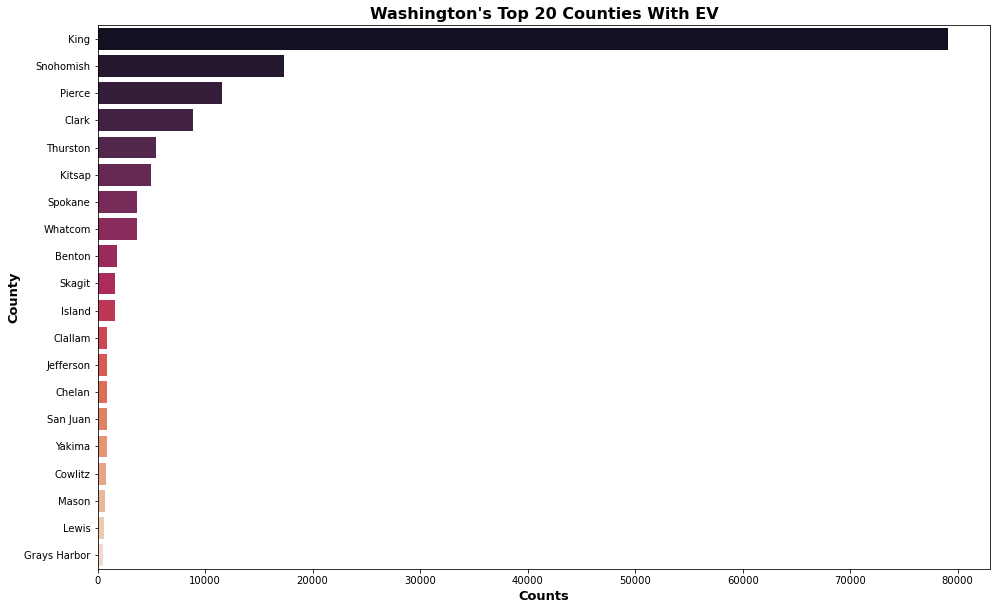

In [19]:
fig=plt.figure(figsize=(16,10))
sns.barplot(x=top_20_counties.Counts,y=top_20_counties.County,palette="rocket")
plt.xlabel("Counts",fontweight='bold',fontsize=13)
plt.ylabel("County",fontweight='bold',fontsize=13)
plt.title("Washington's Top 20 Counties With EV",fontweight='bold',fontsize=16)
plt.show()

In [20]:
ev_WA['County'].value_counts().head(10)

County
King         79075
Snohomish    17307
Pierce       11542
Clark         8849
Thurston      5403
Kitsap        4923
Spokane       3690
Whatcom       3668
Benton        1800
Skagit        1658
Name: count, dtype: int64

In [21]:
counties=["King","Snohomish","Pierce","Clark","Thurston","Kitsap","Spokane","Whatcom","Benton","Skagit" ]
county_brand=ev_WA[ev_WA['County'].isin(counties) & ev_WA['Make'].isin(brands)]
top_county_brands=county_brand.groupby(["Make",'County']).size().reset_index(name="Count")
top_county_brands


,Make,County,Count
0,BMW,Benton,78
1,BMW,Clark,347
2,BMW,King,3805
3,BMW,Kitsap,221
4,BMW,Pierce,487
...,...,...,...
95,VOLVO,Skagit,41
96,VOLVO,Snohomish,344
97,VOLVO,Spokane,47
98,VOLVO,Thurston,87


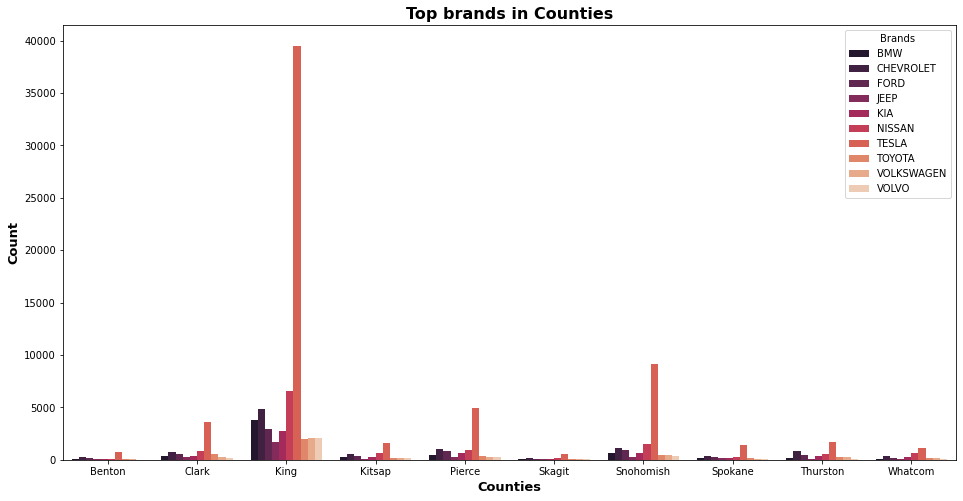

In [22]:
fig=plt.figure(figsize=(16,8))
sns.barplot(data=top_county_brands,x="County",y="Count",hue="Make",palette="rocket")
plt.xlabel("Counties",fontweight='bold',fontsize=13)
plt.ylabel("Count",fontweight='bold',fontsize=13)
plt.title("Top brands in Counties",fontweight='bold',fontsize=16)
plt.legend(title="Brands")
plt.show()

In [23]:
ev_WA['Model Year'].value_counts()

Model Year
2023    37052
2022    27734
2021    18610
2018    14407
2020    11263
2019    10693
2017     8552
2016     5632
2015     4919
2013     4555
2014     3598
2012     1630
2011      795
2024      642
2010       24
2008       18
2000        8
1999        4
2002        2
1998        1
2003        1
1997        1
Name: count, dtype: int64

In [24]:
ev_yr_12to23=ev_WA[(ev_WA['Model Year']>=2012) & (ev_WA['Model Year']<=2023)]
yr_count=ev_yr_12to23.groupby(['Model Year','Make']).size().reset_index(name="Count")
yr_count


,Model Year,Make,Count
0,2012,AZURE DYNAMICS,4
1,2012,CHEVROLET,471
2,2012,FISKER,16
3,2012,FORD,11
4,2012,MITSUBISHI,40
...,...,...,...
202,2023,SUBARU,559
203,2023,TESLA,17956
204,2023,TOYOTA,510
205,2023,VOLKSWAGEN,1312


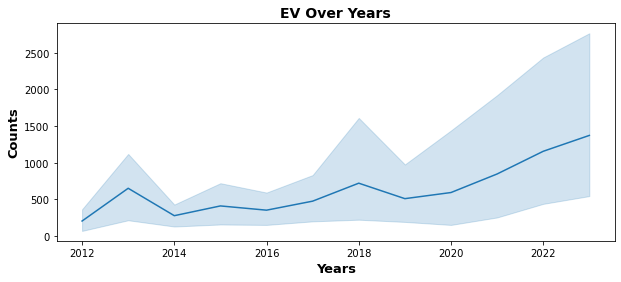

In [25]:
custom_palette=["green"]
fig=plt.figure(figsize=(10,4))
sns.lineplot(data=yr_count,x="Model Year",y="Count",palette=custom_palette)
plt.xlabel("Years",fontweight='bold',fontsize=13)
plt.ylabel("Counts",fontweight='bold',fontsize=13)
plt.title("EV Over Years",fontweight='bold',fontsize=14)
plt.show()

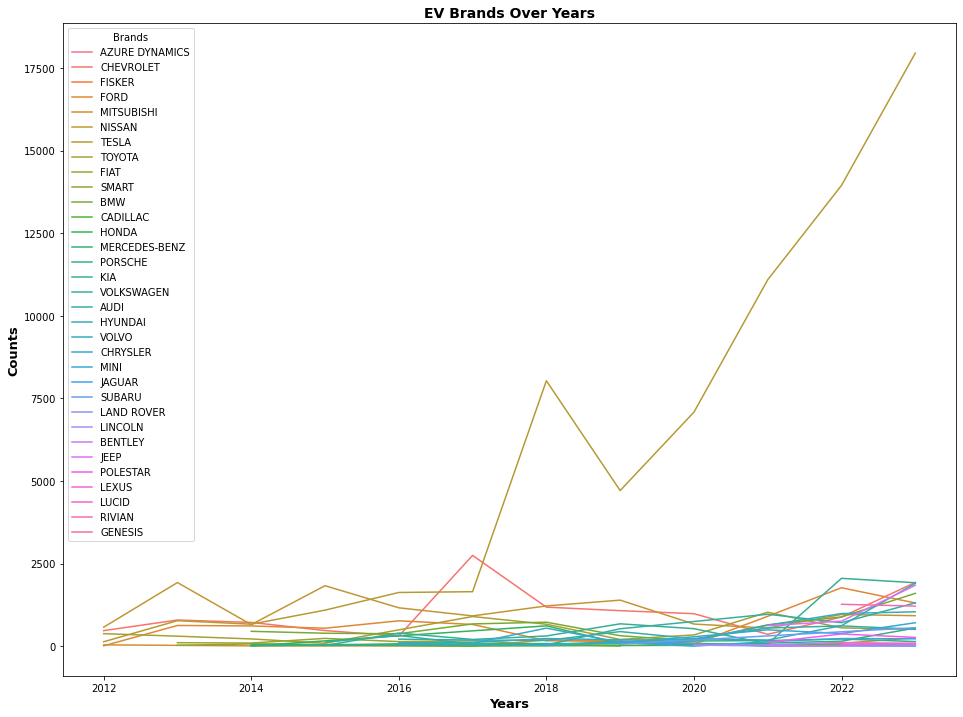

In [26]:
fig=plt.figure(figsize=(16,12))
sns.lineplot(data=yr_count,x="Model Year",y="Count",hue="Make")
plt.xlabel("Years",fontweight='bold',fontsize=13)
plt.ylabel("Counts",fontweight='bold',fontsize=13)
plt.legend(title="Brands")
plt.title("EV Brands Over Years",fontweight='bold',fontsize=14)
plt.show()

In [27]:
yr_count1=ev_yr_12to23.groupby(['Model Year','Electric Vehicle Type']).size().reset_index(name="Count")
yr_count1

,Model Year,Electric Vehicle Type,Count
0,2012,Battery Electric Vehicle (BEV),776
1,2012,Plug-in Hybrid Electric Vehicle (PHEV),854
2,2013,Battery Electric Vehicle (BEV),2922
3,2013,Plug-in Hybrid Electric Vehicle (PHEV),1633
4,2014,Battery Electric Vehicle (BEV),1792
5,2014,Plug-in Hybrid Electric Vehicle (PHEV),1806
6,2015,Battery Electric Vehicle (BEV),3617
7,2015,Plug-in Hybrid Electric Vehicle (PHEV),1302
8,2016,Battery Electric Vehicle (BEV),3855
9,2016,Plug-in Hybrid Electric Vehicle (PHEV),1777


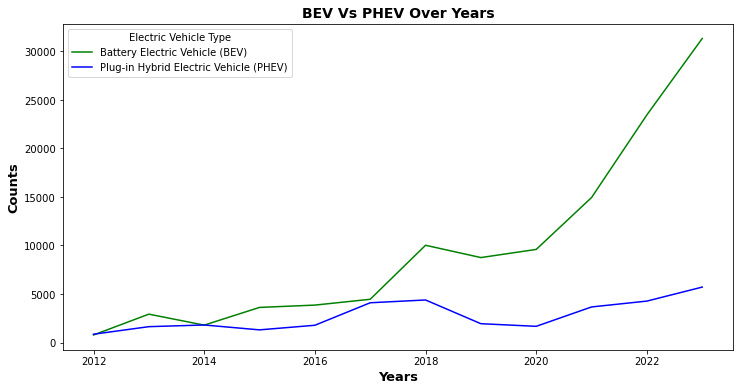

In [28]:
palette1=["green","blue"]
fig=plt.figure(figsize=(12,6))
sns.lineplot(data=yr_count1,x="Model Year",y="Count",hue="Electric Vehicle Type",palette=palette1)
plt.xlabel("Years",fontweight='bold',fontsize=13)
plt.ylabel("Counts",fontweight='bold',fontsize=13)
plt.legend(title="Electric Vehicle Type")
plt.title("BEV Vs PHEV Over Years",fontweight='bold',fontsize=14)
plt.show()

In [29]:
bev=ev_WA[(ev_WA['Electric Vehicle Type'])=="Battery Electric Vehicle (BEV)"]
bev
bev_brands=bev.groupby(['Make']).size().reset_index(name="Count")
bev_brands


,Make,Count
0,AUDI,1656
1,AZURE DYNAMICS,9
2,BMW,1793
3,CADILLAC,83
4,CHEVROLET,7128
5,FIAT,806
6,FORD,3902
7,GENESIS,107
8,HYUNDAI,2692
9,JAGUAR,228


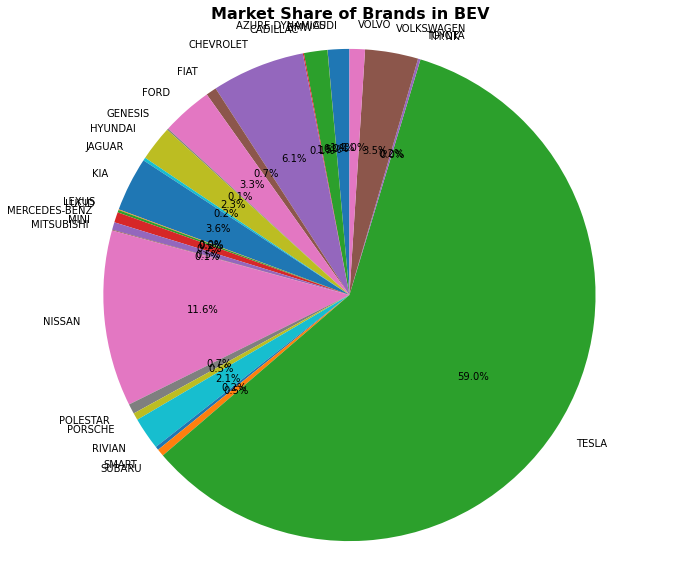

In [30]:
fig=plt.figure(figsize=(12,10))
plt.pie(bev_brands['Count'],labels=bev_brands["Make"],autopct='%1.1f%%',startangle=90)
plt.title("Market Share of Brands in BEV",fontweight='bold',fontsize=16)
plt.axis("equal")
plt.show()

In [31]:
phev=ev_WA[(ev_WA['Electric Vehicle Type'])=="Plug-in Hybrid Electric Vehicle (PHEV)"]
phev
phev_brands=phev.groupby(['Make']).size().reset_index(name="Count")
phev_brands

,Make,Count
0,ALFA ROMEO,12
1,AUDI,1342
2,BENTLEY,2
3,BMW,4633
4,CADILLAC,92
5,CHEVROLET,4876
6,CHRYSLER,2626
7,FISKER,16
8,FORD,3690
9,HONDA,808


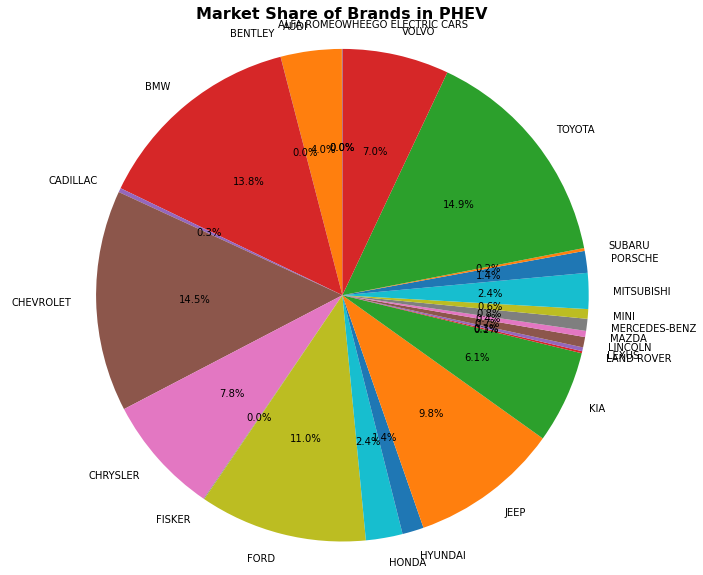

In [32]:
fig=plt.figure(figsize=(12,10))
plt.pie(phev_brands['Count'],labels=phev_brands["Make"],autopct='%1.1f%%',startangle=90)
plt.title("Market Share of Brands in PHEV",fontweight='bold',fontsize=16)
plt.axis("equal")
plt.show()

In [33]:
tesla=ev_WA[(ev_WA["Make"])=="TESLA"]
tesla.head()
tesla_model=tesla.groupby(["Model","Model Year"]).size().reset_index(name="Count")
tesla_model=tesla_model.sort_values(by="Model Year")

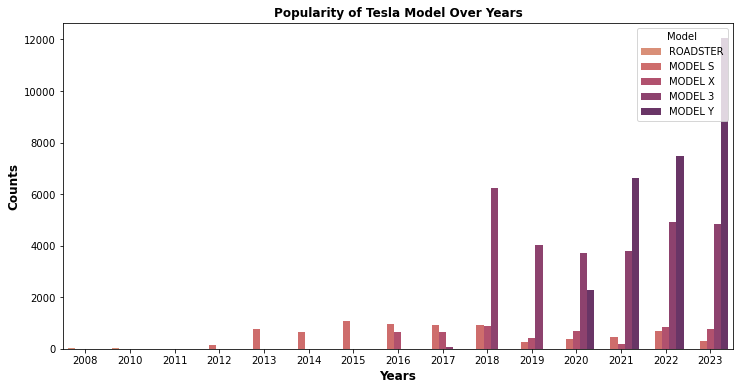

In [34]:
fig=plt.figure(figsize=(12,6))
sns.barplot(data=tesla_model,x="Model Year",y="Count",hue="Model",palette="flare")
plt.legend(title="Model")
plt.xlabel("Years",fontweight="bold",fontsize=12)
plt.ylabel("Counts",fontweight="bold",fontsize=12)
plt.title("Popularity of Tesla Model Over Years",fontweight="bold",fontsize=12)
plt.show()

In [35]:
cafv=ev_WA["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()
cafv

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    69581
Clean Alternative Fuel Vehicle Eligible                         62793
Not eligible due to low battery range                           17767
Name: count, dtype: int64

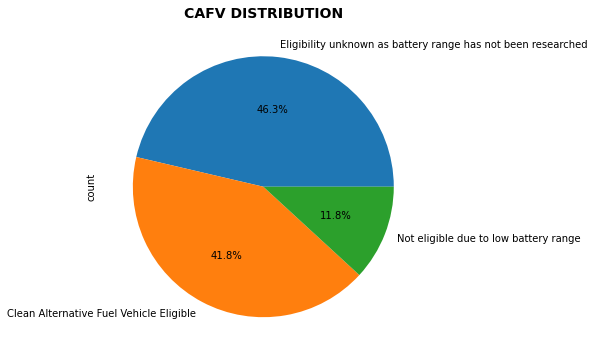

In [36]:
fig=plt.figure(figsize=(6,6))
cafv.plot(kind="pie",autopct='%1.1f%%')
plt.title("CAFV DISTRIBUTION",fontweight="bold",fontsize=14)
plt.show()

In [37]:
bev_cafv=bev[(bev["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])=="Clean Alternative Fuel Vehicle Eligible"]
bev_cafv.head()


,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
5,Snohomish,Marysville,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,PUGET SOUND ENERGY INC
7,King,Woodinville,WA,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
8,Island,Coupeville,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC


In [38]:
phev_cafv=phev[(phev["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])=="Clean Alternative Fuel Vehicle Eligible"]
phev_cafv.head()


,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC
6,King,Kent,WA,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
22,Kitsap,Bremerton,WA,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,PUGET SOUND ENERGY INC
44,King,Tukwila,WA,2023,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
47,Kitsap,Suquamish,WA,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,PUGET SOUND ENERGY INC


In [39]:
ev_cafv=pd.concat([bev_cafv,phev_cafv],ignore_index=True)
ev_cafv
pct_cafv=ev_cafv["Electric Vehicle Type"].value_counts()
pct_cafv

Electric Vehicle Type
Battery Electric Vehicle (BEV)            46995
Plug-in Hybrid Electric Vehicle (PHEV)    15798
Name: count, dtype: int64

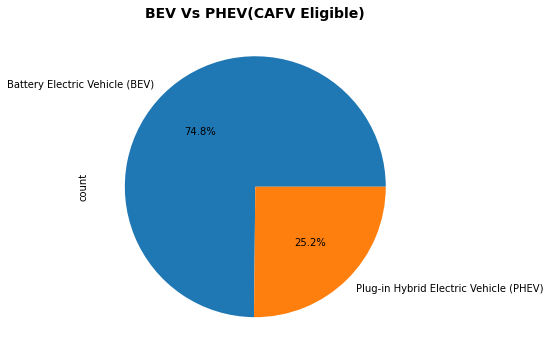

In [40]:
fig=plt.figure(figsize=(12,6))
palette2=["green","grey"]
pct_cafv.plot(kind="pie",autopct='%1.1f%%')

plt.title("BEV Vs PHEV(CAFV Eligible)",fontweight='bold',fontsize=14)
plt.show()

In [41]:
value_to_remove=0
ev_WA=ev_WA[ev_WA["Electric Range"]!=value_to_remove]
range_sale=ev_WA.groupby(["Electric Range","Model"]).size().reset_index(name="Count")
range_sale=range_sale.sort_values(by="Count")
range_sales=range_sale.tail(10)
range_sales

,Electric Range,Model,Count
93,32,PACIFICA,1989
65,21,WRANGLER,2066
191,291,MODEL Y,2272
123,53,VOLT,2506
78,25,PRIUS PRIME,2520
170,208,MODEL S,2529
180,238,BOLT EV,2722
143,84,LEAF,3646
175,220,MODEL 3,4094
173,215,MODEL 3,6226


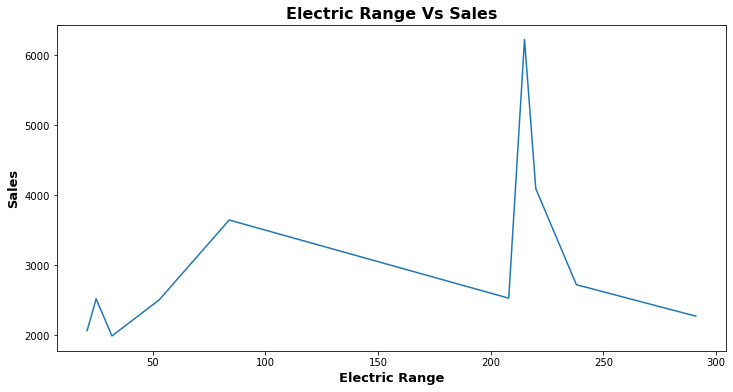

In [42]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(data=range_sales,x="Electric Range",y="Count",palette=palette2)
plt.xlabel("Electric Range",fontweight='bold',fontsize=13)
plt.ylabel("Sales",fontweight='bold',fontsize=13)
plt.title("Electric Range Vs Sales",fontweight='bold',fontsize=16)
plt.show()

In [43]:
bev=ev_WA[(ev_WA['Electric Vehicle Type'])=="Battery Electric Vehicle (BEV)"]
bev
bev_range=bev.groupby(['Electric Range','Electric Vehicle Type']).size().reset_index(name="Count")
bev_range=bev_range.tail(1)

In [44]:
phev=ev_WA[(ev_WA['Electric Vehicle Type'])=="Plug-in Hybrid Electric Vehicle (PHEV)"]
phev
phev_range=phev.groupby(['Electric Range','Electric Vehicle Type']).size().reset_index(name="Count")
phev_range=phev_range.tail(1)
ev_range=pd.concat([phev_range,bev_range],ignore_index=True)
ev_range

,Electric Range,Electric Vehicle Type,Count
0,153,Plug-in Hybrid Electric Vehicle (PHEV),4
1,337,Battery Electric Vehicle (BEV),77


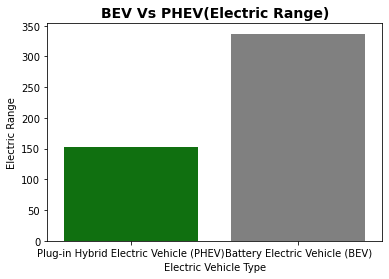

In [45]:
sns.barplot(data=ev_range,x='Electric Vehicle Type',y='Electric Range',palette=palette2)
plt.title("BEV Vs PHEV(Electric Range)",fontweight="bold",fontsize=14)
plt.show()

In [46]:
brand_range=ev_WA.groupby(["Make",'Electric Range']).size().reset_index(name="count")
brand_range=brand_range.sort_values(by="Electric Range",ascending=False)
brand_range
brand_range=brand_range.drop_duplicates(subset=["Make"])
brand_range
brand_ranges=brand_range.head(10)
brand_ranges

,Make,Electric Range,count
145,TESLA,337,77
42,CHEVROLET,259,984
69,HYUNDAI,258,208
82,KIA,239,848
70,JAGUAR,234,199
113,POLESTAR,233,118
11,AUDI,222,133
112,NISSAN,215,243
123,PORSCHE,203,121
31,BMW,153,98


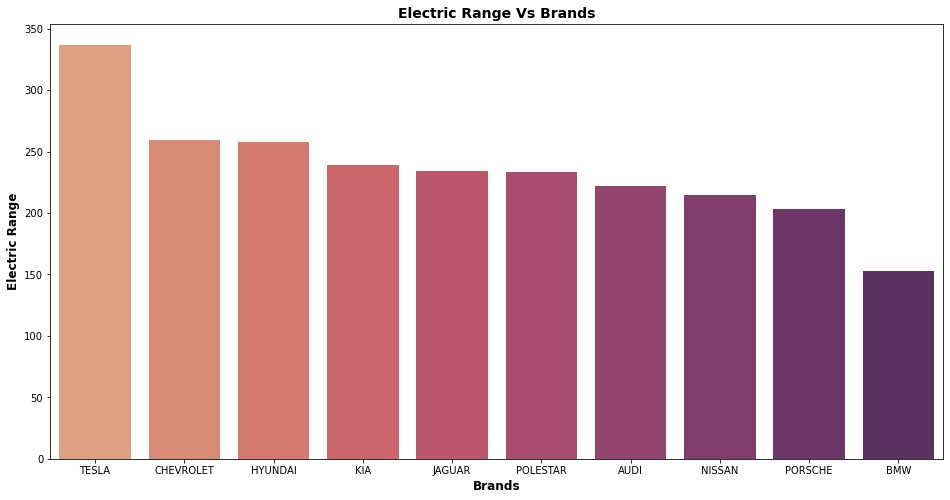

In [47]:
fig=plt.figure(figsize=(16,8))
sns.barplot(data=brand_ranges,x='Make',y='Electric Range',palette="flare")
plt.title("Electric Range Vs Brands",fontweight="bold",fontsize=14)
plt.xlabel("Brands",fontweight='bold',fontsize=12)
plt.ylabel("Electric Range",fontweight='bold',fontsize=12)
plt.show()

In [48]:
tesla_range=ev_WA[ev_WA["Make"]=="TESLA"]
model_range=tesla_range.groupby(["Model","Electric Range"]).size().reset_index(name="Count")
model_range=model_range.sort_values(by="Electric Range",ascending=False)
model_range=model_range.drop_duplicates(subset="Model")
model_range

,Model,Electric Range,Count
11,MODEL S,337,77
4,MODEL 3,322,1739
15,MODEL X,293,450
16,MODEL Y,291,2272
18,ROADSTER,245,28


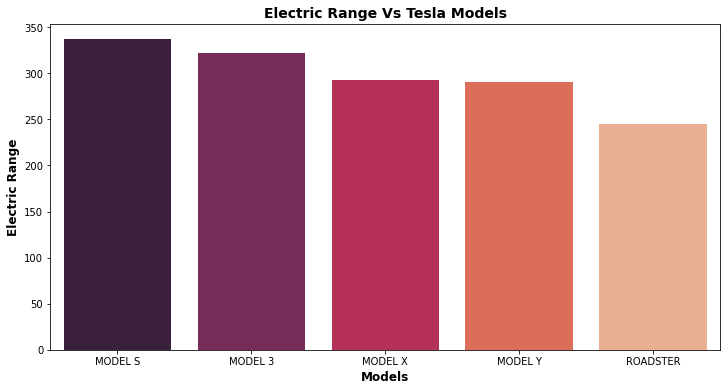

In [49]:
fig=plt.figure(figsize=(12,6))
sns.barplot(data=model_range,x='Model',y='Electric Range',palette="rocket")
plt.title("Electric Range Vs Tesla Models",fontweight="bold",fontsize=14)
plt.xlabel("Models",fontweight='bold',fontsize=12)
plt.ylabel("Electric Range",fontweight='bold',fontsize=12)
plt.show()

In [71]:
ev_range=ev_WA.groupby(["Electric Range","Electric Vehicle Type","Model Year"]).size().reset_index(name="Count")
ev_ranges=ev_range[(ev_range["Model Year"]>2010) & (ev_range["Model Year"]<2020)]
ev_ranges

,Electric Range,Electric Vehicle Type,Model Year,Count
0,6,Plug-in Hybrid Electric Vehicle (PHEV),2012,367
1,6,Plug-in Hybrid Electric Vehicle (PHEV),2013,284
2,6,Plug-in Hybrid Electric Vehicle (PHEV),2014,195
3,6,Plug-in Hybrid Electric Vehicle (PHEV),2015,90
4,8,Plug-in Hybrid Electric Vehicle (PHEV),2017,5
...,...,...,...,...
278,249,Battery Electric Vehicle (BEV),2018,924
279,258,Battery Electric Vehicle (BEV),2019,42
282,265,Battery Electric Vehicle (BEV),2012,134
284,270,Battery Electric Vehicle (BEV),2019,268


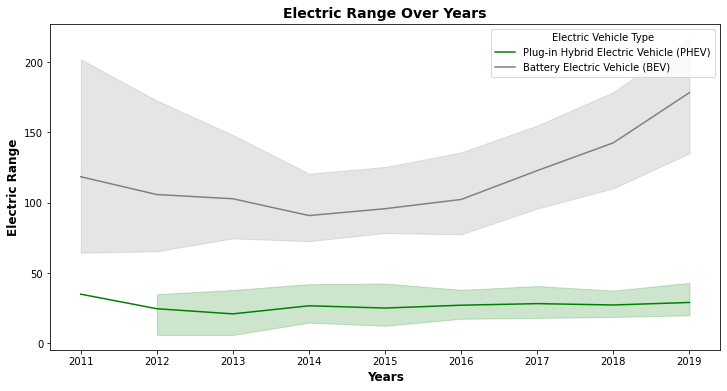

In [78]:
fi=plt.figure(figsize=(12,6))
sns.lineplot(data=ev_ranges,x="Model Year",y="Electric Range",hue="Electric Vehicle Type",palette=palette2)
plt.title("Electric Range Over Years",fontweight="bold",fontsize=14)
plt.xlabel("Years",fontweight='bold',fontsize=12)
plt.legend(title="Electric Vehicle Type")
plt.ylabel("Electric Range",fontweight='bold',fontsize=12)
plt.show()